# Welter issue #10
## Starspot Teff, Fill factor vs order
### Part 3

Michael Gully-Santiago  
Thursday, May 12, 2016  

Woo.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in all the data.
No spot-checking necessary, since we already did that in the previous notebook.

### IGRINS data of ASASSN15qi

In [3]:
import h5py

## Actual data

You can have pandas read the clipboard if you copy the output from the terminal.  Saves a step of copying files over, at the expense of reproducibility...

In [4]:
import pandas as pd

In [5]:
sf_dat = pd.read_csv('../data/analysis/IGRINS_LkCa4_run02_last20kMCMC.csv')
sf_dat2 = pd.read_csv('../data/analysis/IGRINS_LkCa4_run01_last20kMCMC.csv')
sf_dat3 = pd.read_csv('../data/analysis/IGRINS_ESPaDOnS_run01_last10kMCMC.csv')
sf_dat4 = pd.read_csv('../data/analysis/IGRINS_mix_emcee_last200.csv')

## Plot of $T_{eff}$ vs. spectral order

In [6]:
N_orders = len(sf_dat.m_val)

In [7]:
sns.set_style('ticks')
sns.set_context('talk')

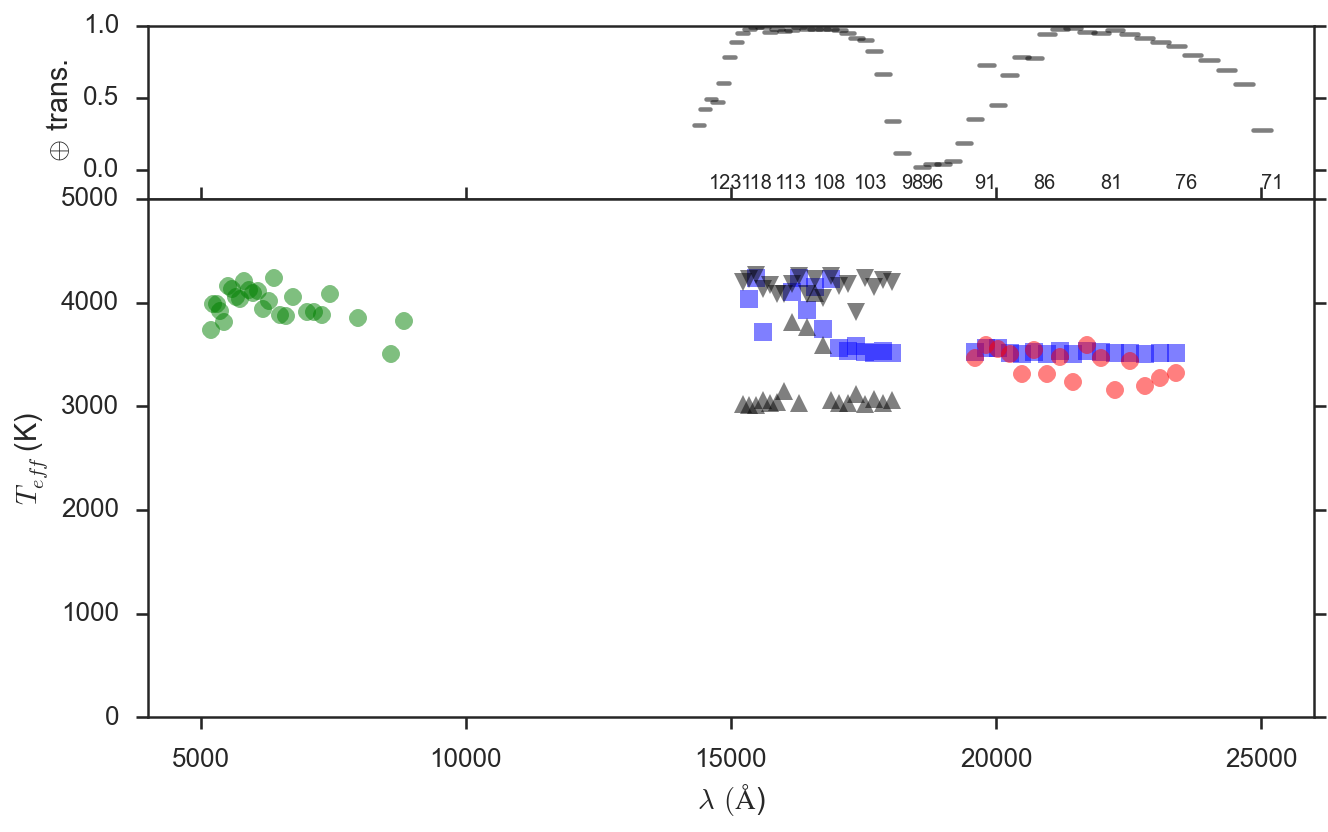

In [8]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(4000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [sf_dat.wl_start[i], sf_dat.wl_end[i]]
    y = [sf_dat.tell_trans[i]]*2
    ax1.plot(x, y, 'k-', alpha=0.5)
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    if (sf_dat.number.values[i] % 5) == 0:
        ax1.text(sf_dat.wl_center[i], -0.13, '{}'.format(sf_dat.m_val.values[i]))
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])


ax.plot(sf_dat2.wl_center, sf_dat2.Teff_50p, 'bs', alpha=0.5)
ax.plot(sf_dat.wl_center, sf_dat.Teff_50p, 'ro', alpha=0.5)
ax.plot(sf_dat3.wl_center, sf_dat3.Teff_50p, 'go', alpha=0.5)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff_50p, 'kv', alpha=0.5)
ax.plot(sf_dat4.wl_center, sf_dat4.Teff2_50p, 'k^', alpha=0.5)

ax.set_ylim(0, 5000)
ax.set_xlim(4000, 26000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

(3000, 4300)

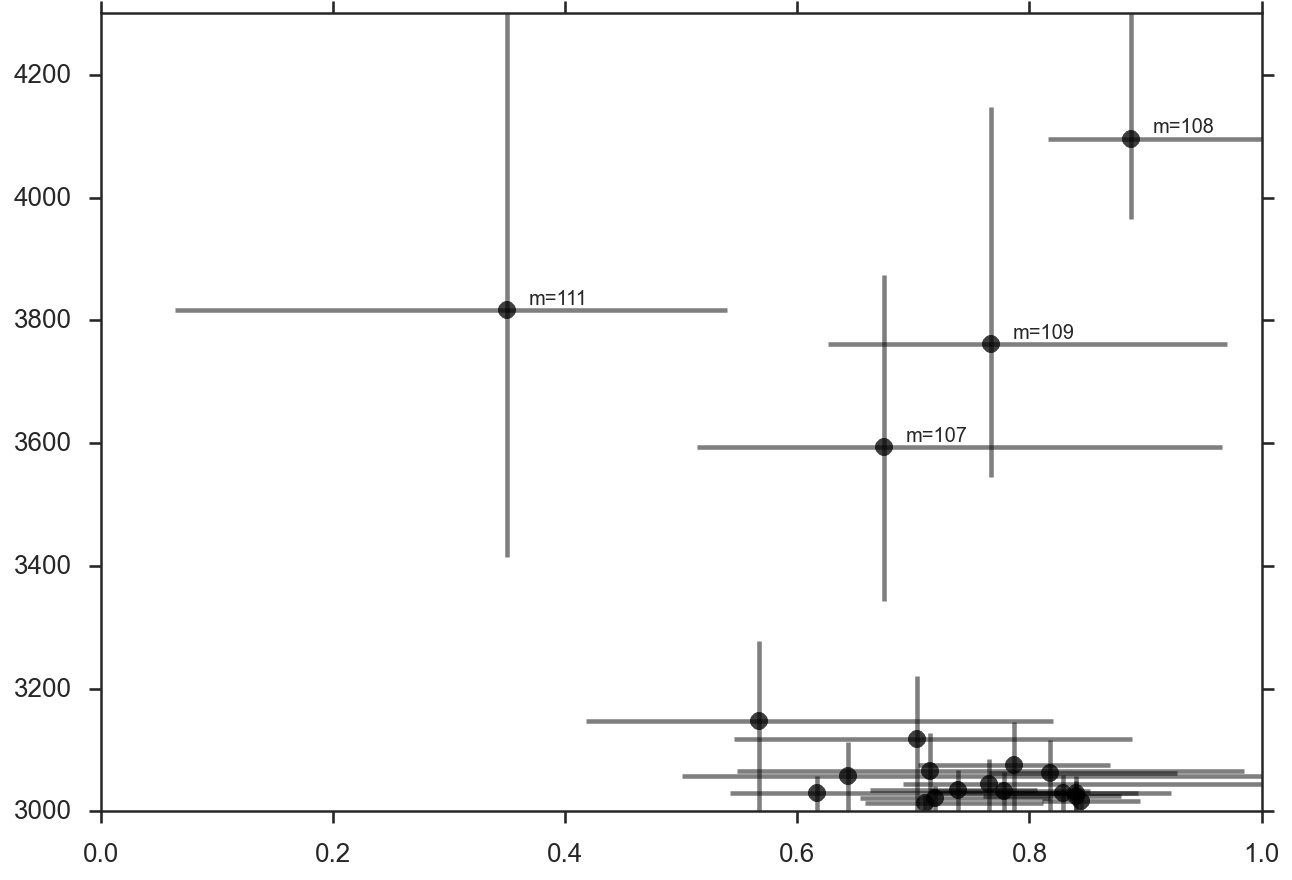

In [11]:
plt.plot(sf_dat4.ff_50p, sf_dat4.Teff2_50p, 'ko', alpha=0.5)
plt.errorbar(sf_dat4.ff_50p, sf_dat4.Teff2_50p, 
             yerr=(sf_dat4.Teff2_95p-sf_dat4.Teff2_50p,
                  sf_dat4.Teff2_50p-sf_dat4.Teff2_05p),
             xerr=(sf_dat4.ff_95p-sf_dat4.ff_50p,
                  sf_dat4.ff_50p-sf_dat4.ff_05p), fmt='ko', alpha=0.5)
#plt.plot(sf_dat4.ff_50p, sf_dat4.Teff_05p, 'rv', alpha=0.5)
#plt.plot(sf_dat4.ff_50p, sf_dat4.Teff_95p, 'rs', alpha=0.5)
bi = sf_dat4.Teff2_50p > 3400
subset = sf_dat4[bi]

subset.reset_index(inplace=True)

for i in range(len(subset)):
    plt.text(subset.ff_50p[i]+0.02, subset.Teff2_50p[i]+10, "m={}".format(subset.m_val[i]))

plt.xlim(0,1)
plt.ylim(3000,4300)

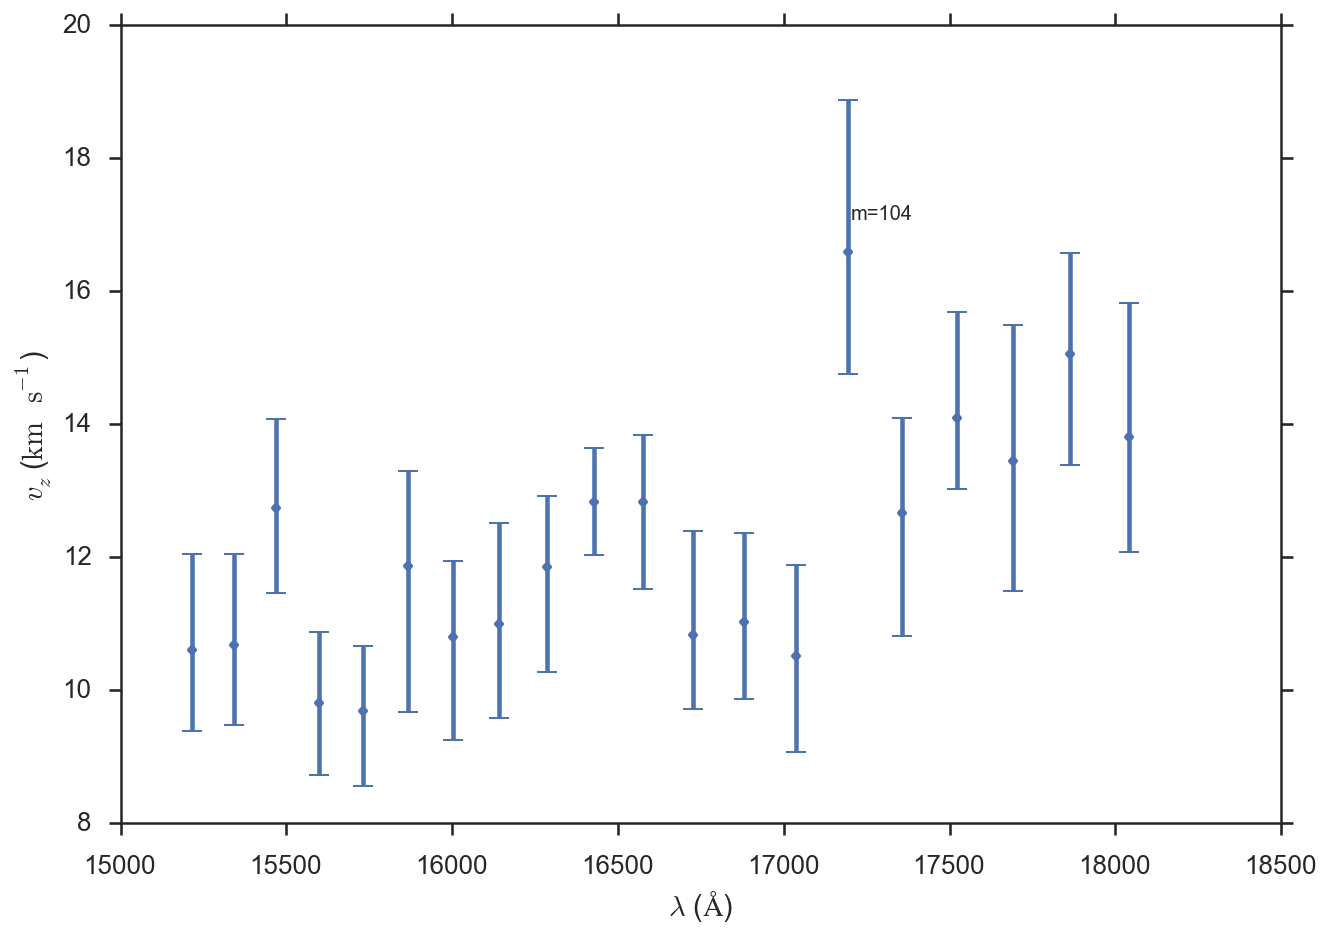

In [12]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.vz_50p, 
             (sf_dat4.vz_50p-sf_dat4.vz_05p, sf_dat4.vz_95p-sf_dat4.vz_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)

bi = sf_dat4.vz_50p > 16
subset = sf_dat4[bi]

subset.reset_index(inplace=True)

for i in range(len(subset)):
    plt.text(subset.wl_center[i]+10, subset.vz_50p[i]+0.5, "m={}".format(subset.m_val[i]))

plt.ylabel('$v_{z}$ ($\mathrm{km \; s}^{-1}$)')
plt.xlabel('$\lambda$ ($\AA$)')

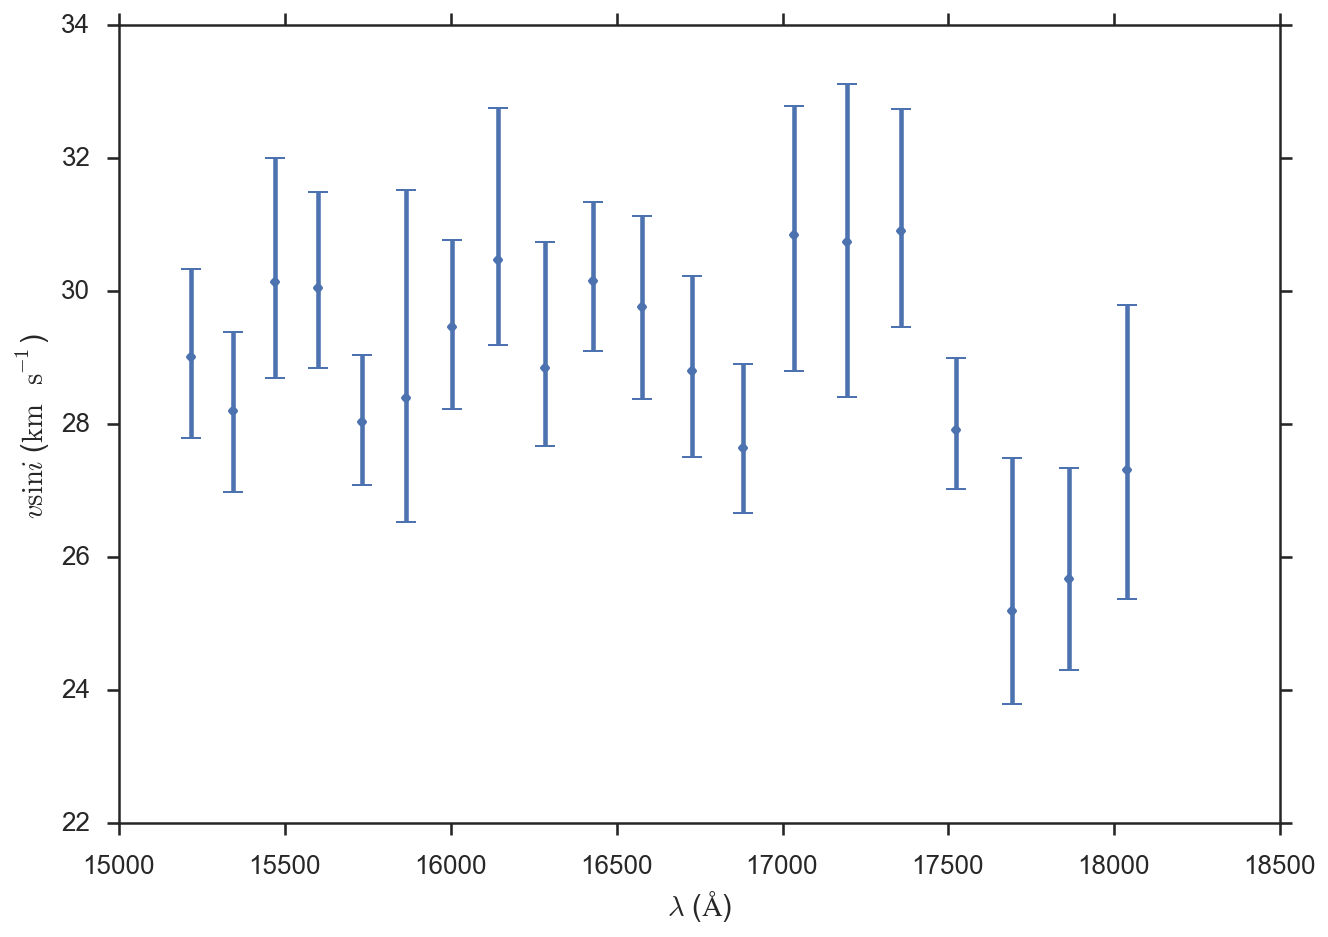

In [13]:
#plt.plot(sf_dat4.wl_center, sf_dat4.vz_50p, '.')
plt.errorbar(sf_dat4.wl_center, sf_dat4.vi_50p, 
             (sf_dat4.vi_50p-sf_dat4.vi_05p, sf_dat4.vi_95p-sf_dat4.vi_50p), 
             fmt='.', barsabove=True, capsize=5, capthick=1)
plt.ylabel('$v\sin{i}$ ($\mathrm{km \; s}^{-1}$)')
plt.xlabel('$\lambda$ ($\AA$)')

The end for now.  